# Get_Top_Tokens_For_Disfluent_Nodes.ipynb
This notebook:
* Obtains the tokens within the disfluent nodes (INTJ, PRN, EDITED) and plots their frequency distributions for each of the following: Google ASR, WhisperX, GroundTruth-max, GroundTruth-min, GroundTruth-neutral.
* Note: You may notice some of the tokens are partial words (ex: *'m* and *'ve* in the first plot). This is correct, as we are plotting tokens and not words.

In [1]:
import pandas as pd
import difflib
from collections import Counter
import matplotlib.pyplot as plt

import tb

import utils_general

df = pd.read_csv("./csv/df-english-fisher-annotations-test-all3.csv")

GOOGLEASR_PARSE
EDITED : Counter({'a': 5, 'the': 4, 'i': 3, 'and': 3, 'little': 3, 'this': 2, 'is': 2, 'some': 2, 'are': 2, 'on': 2, 'of': 2, 'you': 2, 'bit': 2, 'episode': 1, 'which': 1, "'m": 1, 'gonna': 1, 'we': 1, "'ve": 1, 'selected': 1, 'those': 1, 'man': 1, 'his': 1, 'muscles': 1, 'ached': 1, 'incredibly': 1, 'important': 1, 'to': 1, 'they': 1, 'as': 1, 'she': 1, 'legends': 1, 'cast': 1, 'state': 1, 'with': 1, 'beyond': 1, 'literally': 1, 'but': 1, 'so': 1, 'tell': 1, 'us': 1, 'where': 1})


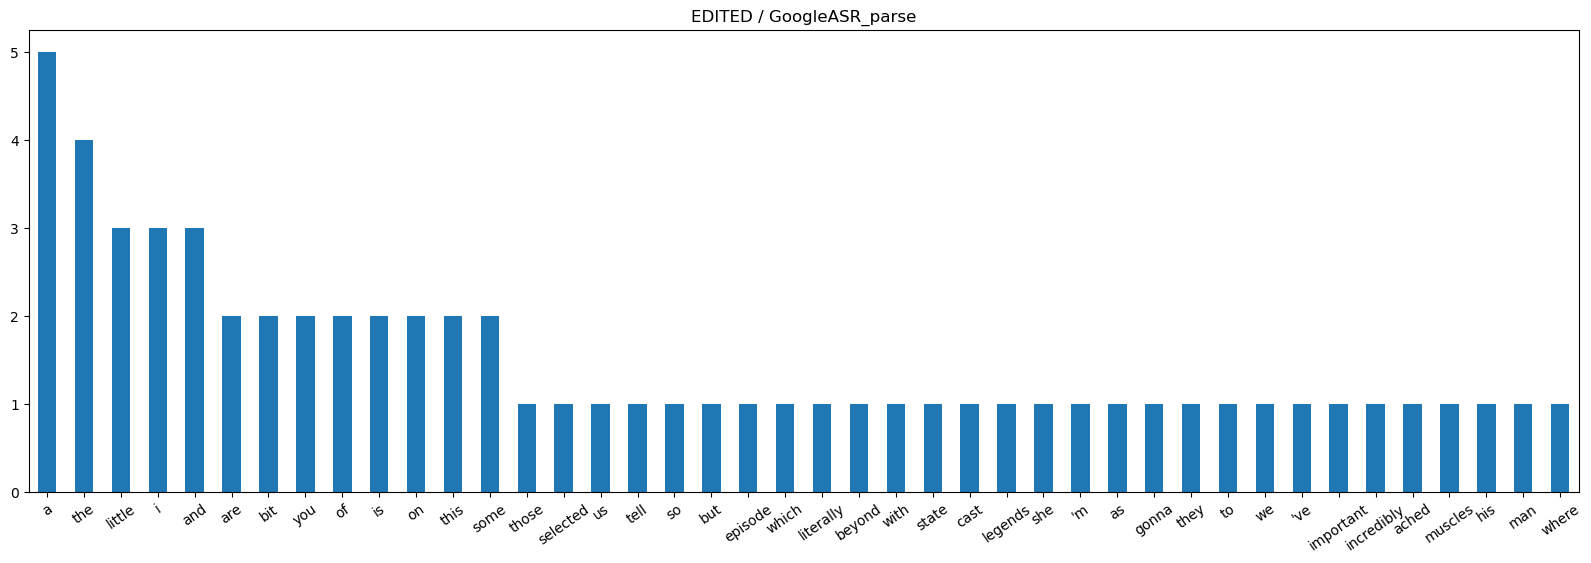

INTJ : Counter({'like': 11, 'yeah': 7, 'so': 2, 'oh': 2, 'hello': 2, 'well': 2, 'mmm': 1, 'say': 1, 'ooh': 1, 'right': 1, 'no': 1, 'hey': 1, 'welcome': 1, 'god': 1, 'man': 1, 'get': 1, 'yes': 1})


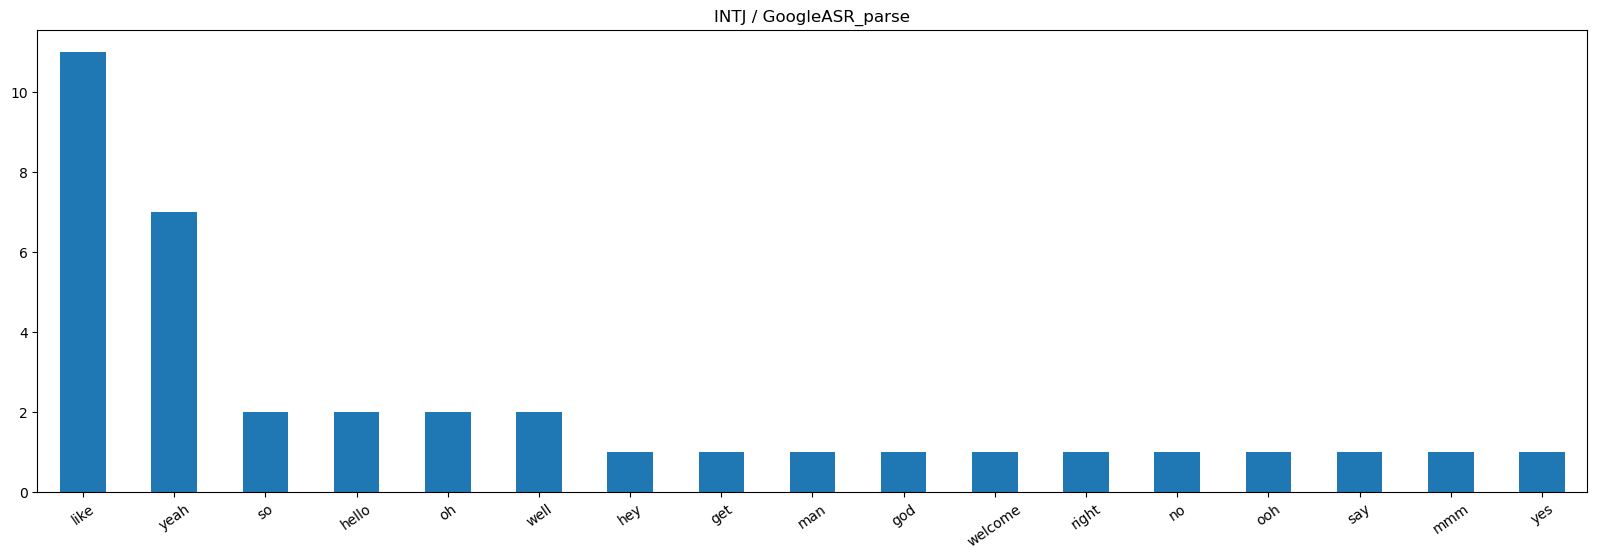

PRN : Counter({'i': 7, 'you': 6, 'know': 6, 'mean': 4, 'think': 2, "'ve": 1, 'decided': 1})


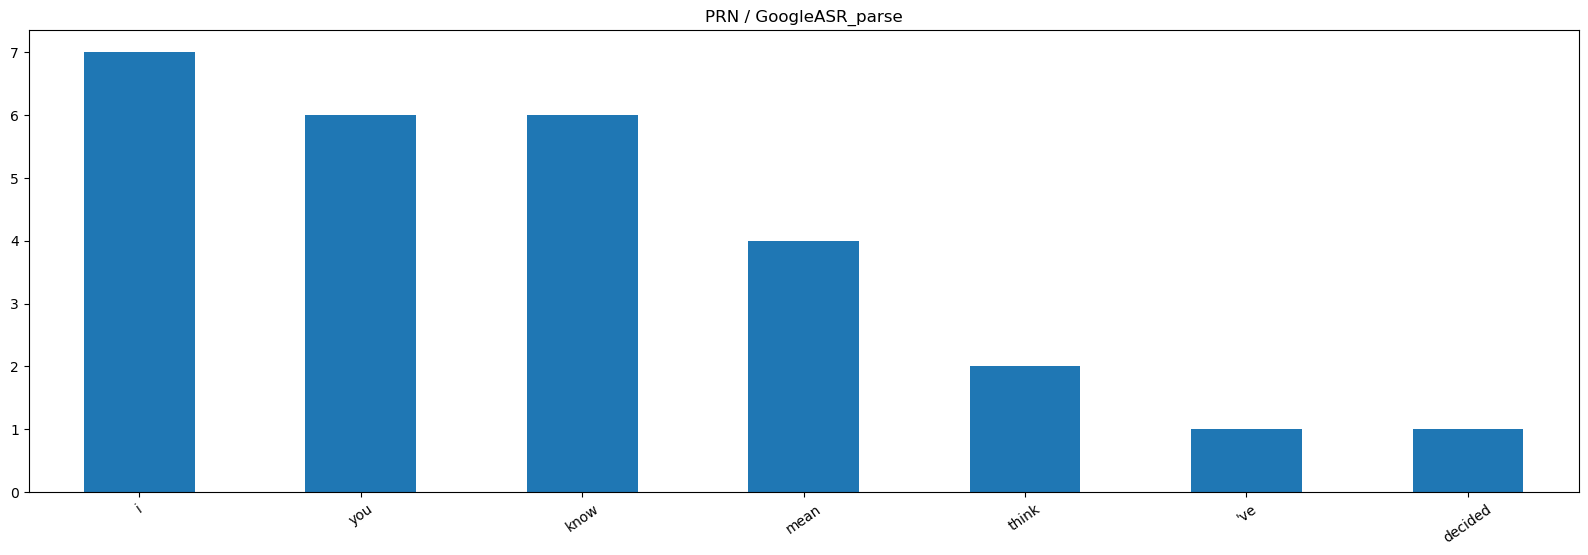

WHISPERX_PARSE
EDITED : Counter({'you': 5, 'i': 4, 'thank': 3, 'and': 2, 'they': 2, 'a': 2, 'the': 2, "'m": 1, 'going': 1, 'to': 1, 'man': 1, 'his': 1, 'muscles': 1, 'ached': 1, "'ve": 1, 'got': 1, 'of': 1, 'would': 1, 'take': 1, 'opportunity': 1, 'brief': 1, 'as': 1, 'dive': 1, 'into': 1, 'your': 1, 'design': 1, 'beyond': 1, 'literally': 1, 'little': 1, 'some': 1, 'but': 1, 'on': 1, 'so': 1, 'are': 1, 'tell': 1, 'us': 1, 'where': 1})


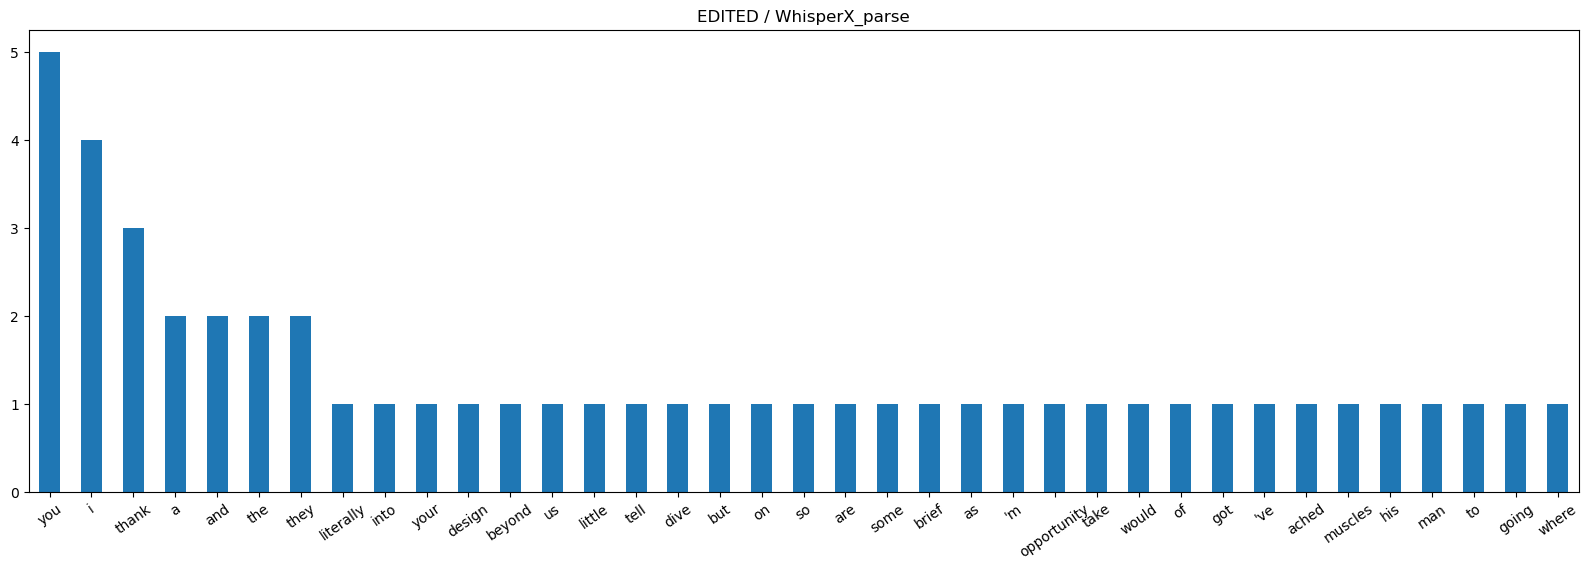

INTJ : Counter({'like': 12, 'yeah': 6, 'um': 4, 'oh': 3, 'so': 2, 'hello': 2, 'well': 2, 'uh': 2, 'shit': 2, 'all': 2, 'right': 2, 'com': 1, 'hell': 1, 'mm-hmm': 1, 'say': 1, 'hiya': 1, 'no': 1, 'hey': 1, 'welcome': 1, 'god': 1, 'yes': 1})


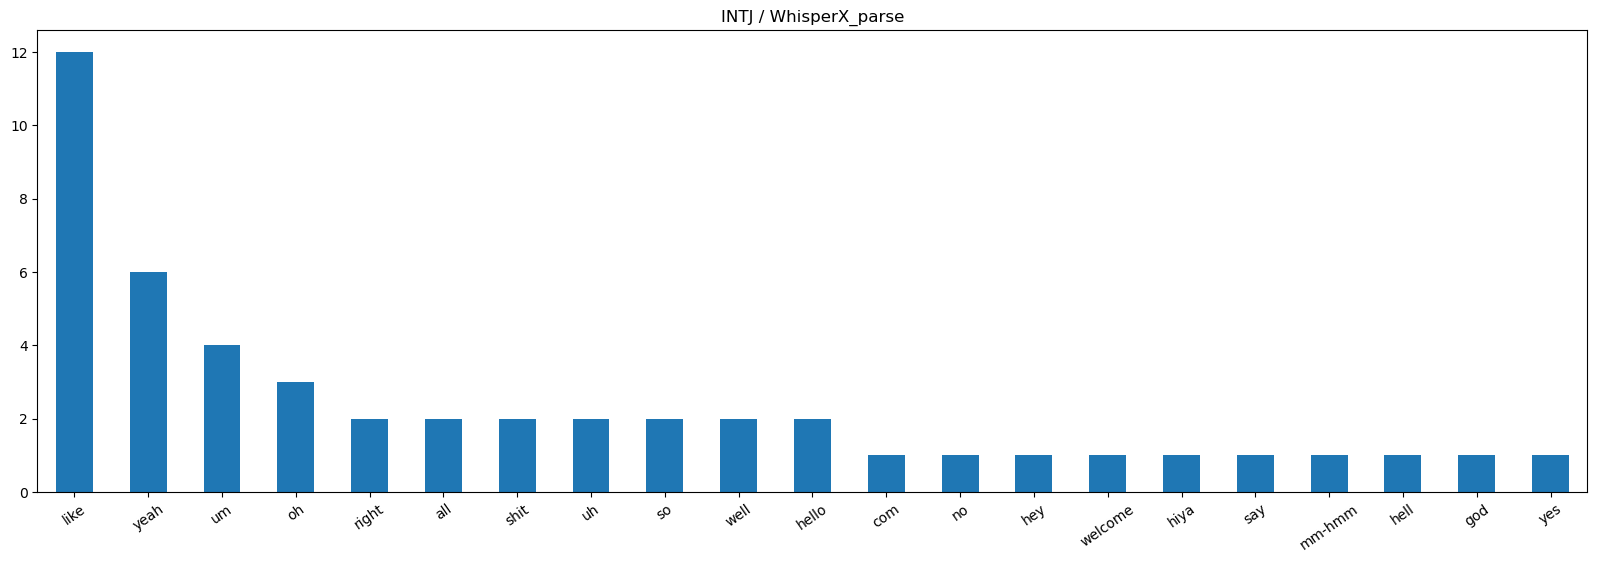

PRN : Counter({'you': 7, 'know': 7, 'i': 4, 'mean': 4, 'before': 1, 'when': 1, 'we': 1, 'had': 1, 'a': 1, 'sponsor': 1, 'information': 1, 'about': 1, 'them': 1, 'would': 1, 'be': 1, 'sunday': 1, 'monday': 1, 'and': 1, 'sundays': 1})


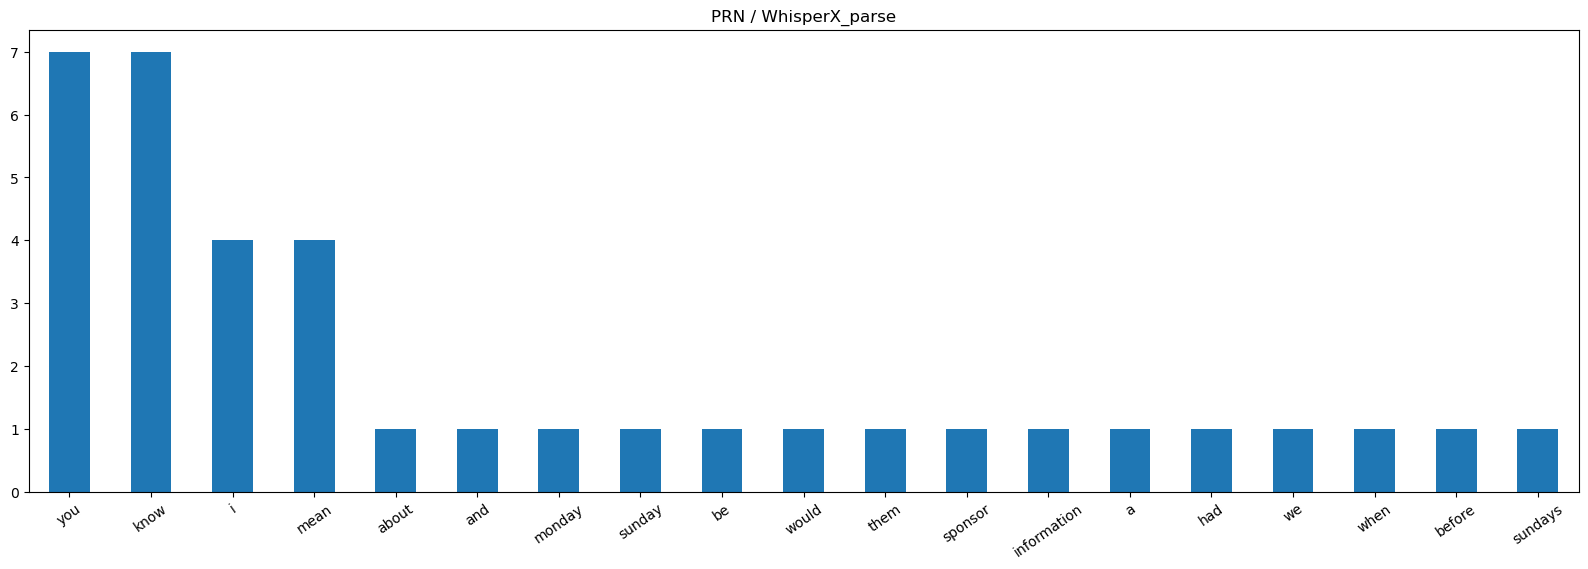

GROUNDTRUTH-MIN_PARSE
EDITED : Counter({'i': 7, 'you': 5, "'m": 3, 'a': 3, 'thank': 3, 'ca': 3, "n't": 3, 'some': 2, 'gonna': 2, 'on': 2, 'anal': 2, 'this': 1, 'is': 1, 'or': 1, 'man': 1, 'his': 1, 'muscles': 1, 'ached': 1, 'and': 1, 'they': 1, "'ve": 1, 'of': 1, 'still': 1, 'we': 1, "'re": 1, 'as': 1, 'dive': 1, 'into': 1, 'your': 1, 'design': 1, 'beyond': 1, 'little': 1, 'jesus': 1, 'see': 1, 'but': 1, 'the': 1, 'jake': 1, 'are': 1, 'tell': 1, 'us': 1, 'where': 1})


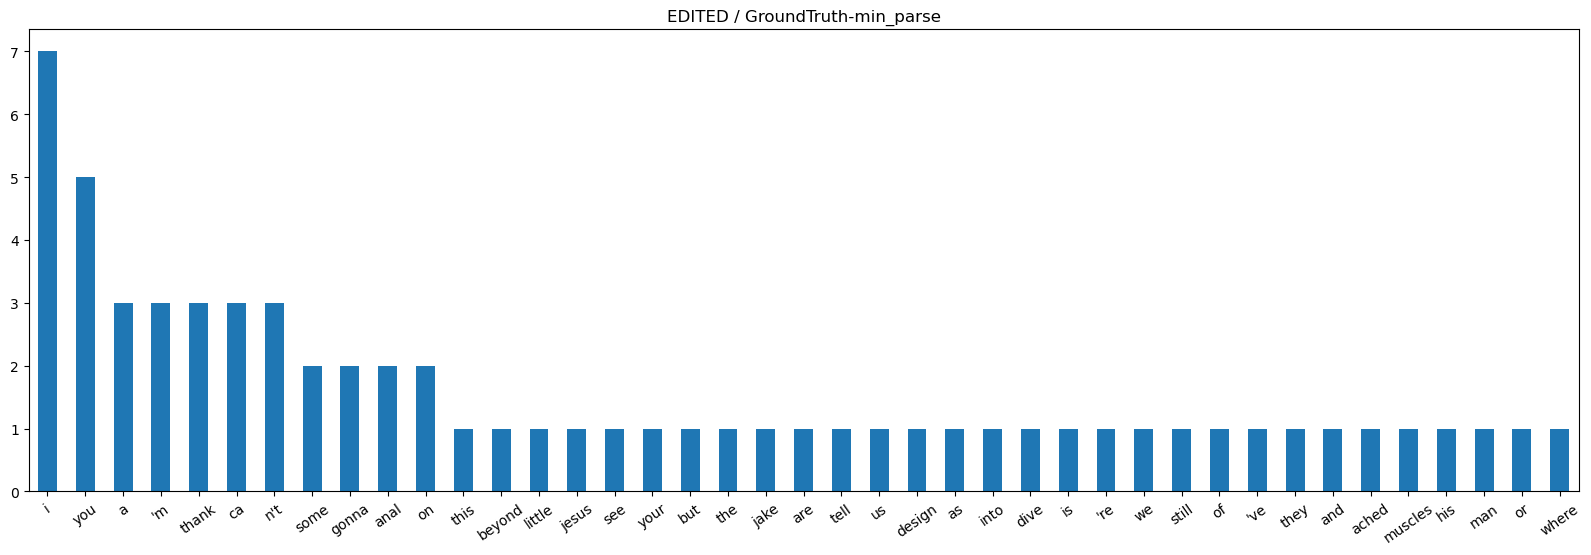

INTJ : Counter({'like': 11, 'uh': 10, 'um': 8, 'yeah': 7, 'yes': 3, 'so': 2, 'hello': 2, 'well': 2, 'alright': 2, 'ow': 1, 'hell': 1, 'say': 1, 'right': 1, 'no': 1, 'hey': 1, 'welcome': 1, 'oh': 1, 'shit': 1})


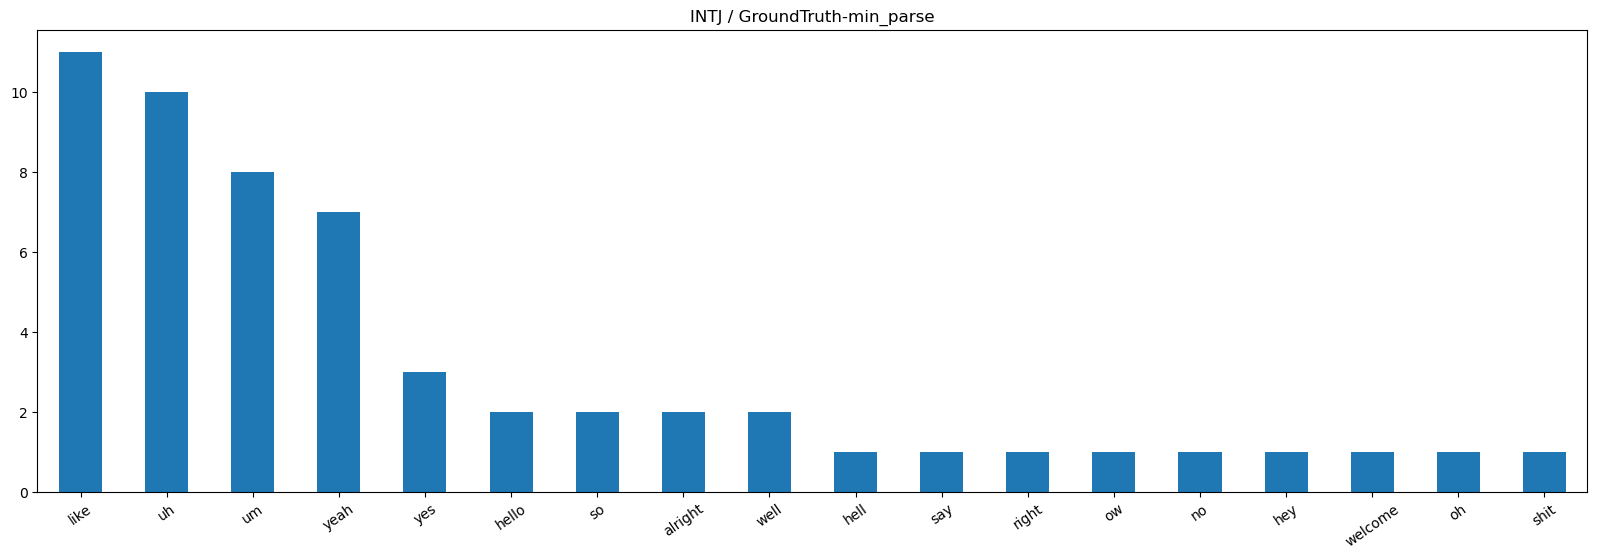

PRN : Counter({'you': 6, 'know': 6, 'i': 5, 'mean': 4, "'ve": 1, 'decided': 1, 'she': 1, 'was': 1, 'years': 1, 'old': 1, 'before': 1, 'when': 1, 'we': 1, 'had': 1, 'a': 1, 'sponsor': 1, 'information': 1, 'about': 1, 'them': 1})


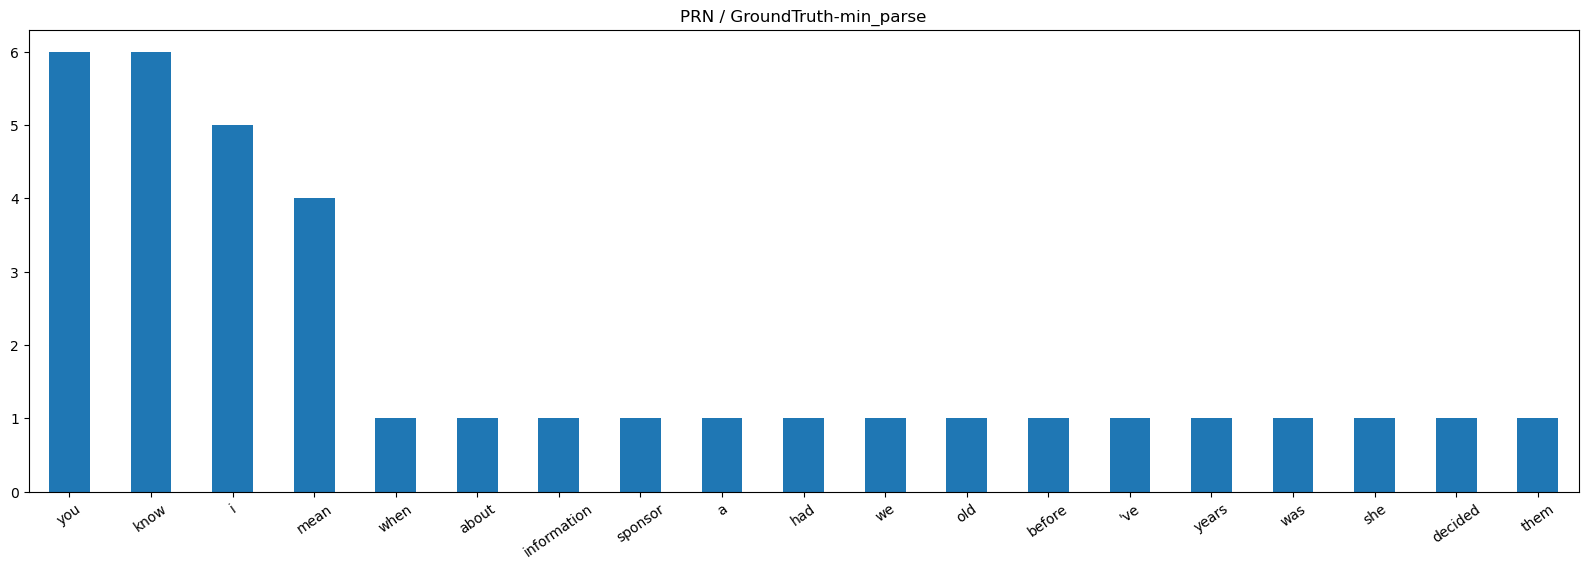

GROUNDTRUTH-MAX_PARSE
EDITED : Counter({'i': 6, 'you': 5, 'a': 3, 'thank': 3, 'ca': 3, "n't": 3, 'some': 2, "'m": 2, 'gonna': 2, 'and': 2, '-': 2, 'on': 2, 'anal': 2, 'this': 1, 'is': 1, 'or': 1, 'they': 1, "'ve": 1, 'of': 1, 'still': 1, 'we': 1, "'re": 1, 'as': 1, 'dive': 1, 'into': 1, 'your': 1, 'design': 1, 'beyond': 1, 'little': 1, 'jesus': 1, 'see': 1, 'but': 1, 'the': 1, 'jake': 1, 'are': 1, 'tell': 1, 'us': 1, 'where': 1})


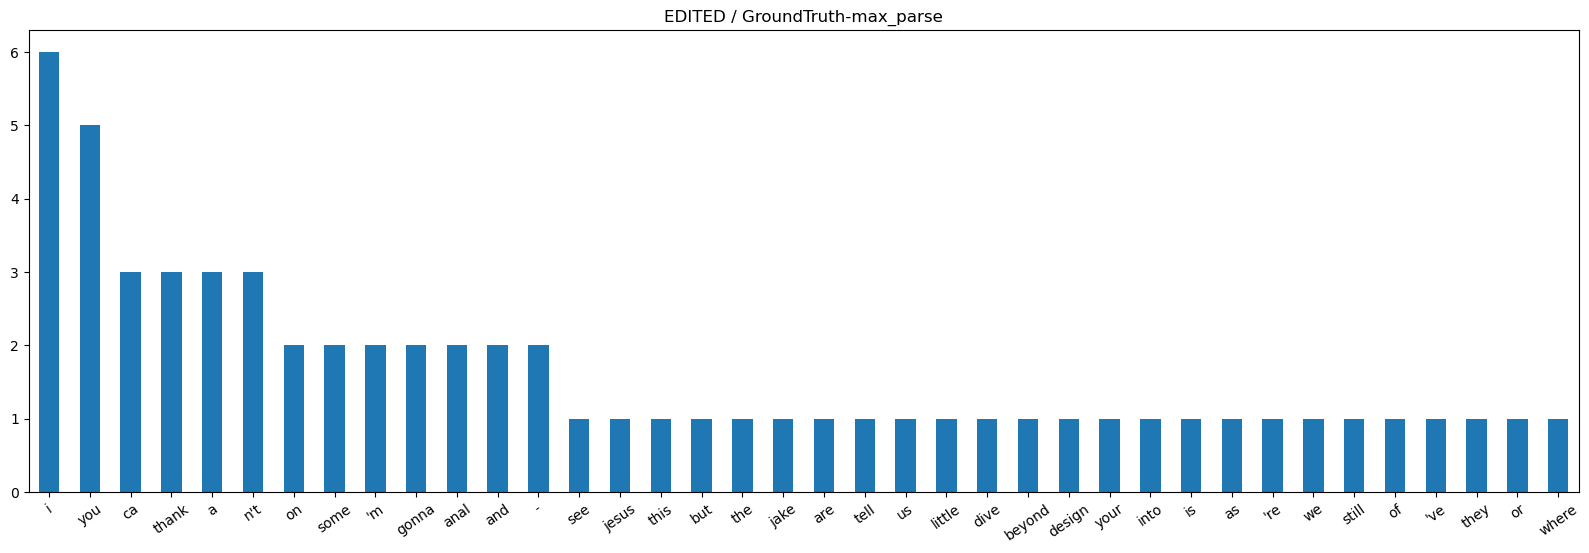

INTJ : Counter({'like': 11, 'uh': 10, 'um': 8, 'yeah': 7, 'yes': 3, 'so': 2, 'hello': 2, 'well': 2, 'alright': 2, 'ow': 1, 'hell': 1, 'say': 1, 'no': 1, 'hey': 1, 'welcome': 1, 'oh': 1, 'shit': 1})


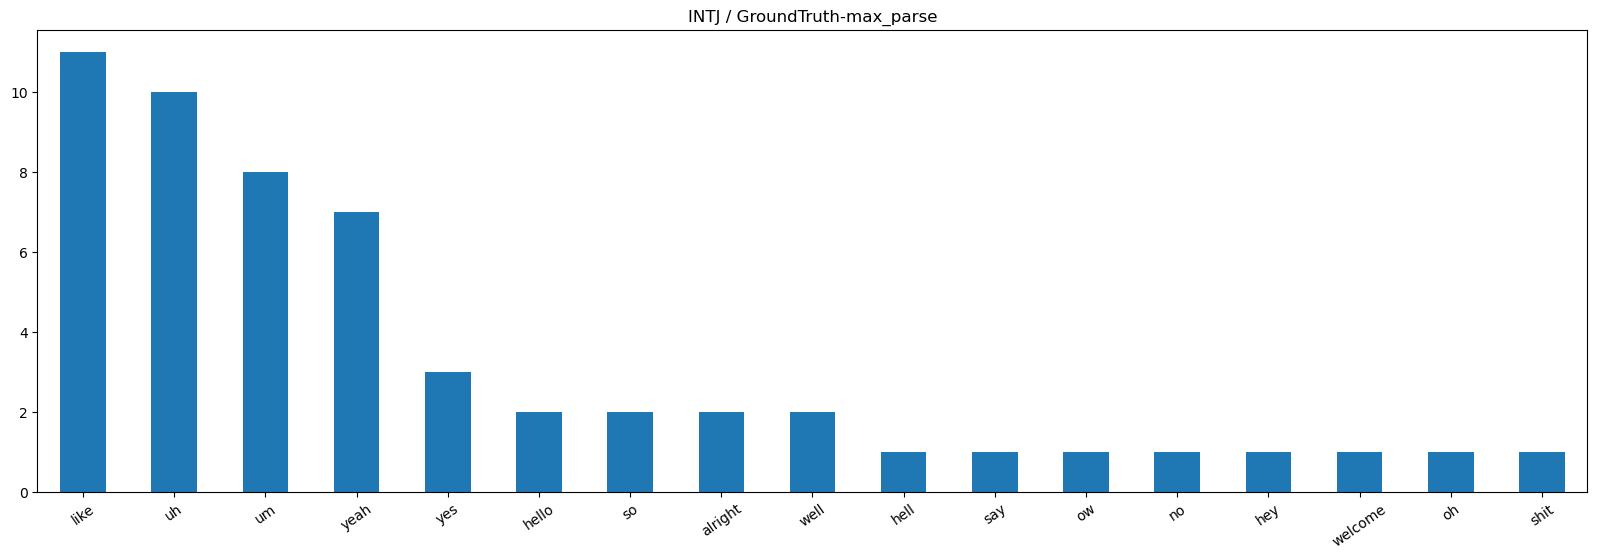

PRN : Counter({'you': 6, 'know': 6, 'i': 5, 'mean': 4, 'think': 1, 'she': 1, 'was': 1, 'years': 1, 'old': 1, 'before': 1, 'when': 1, 'we': 1, 'had': 1, 'a': 1, 'sponsor': 1, 'information': 1, 'about': 1, 'them': 1})


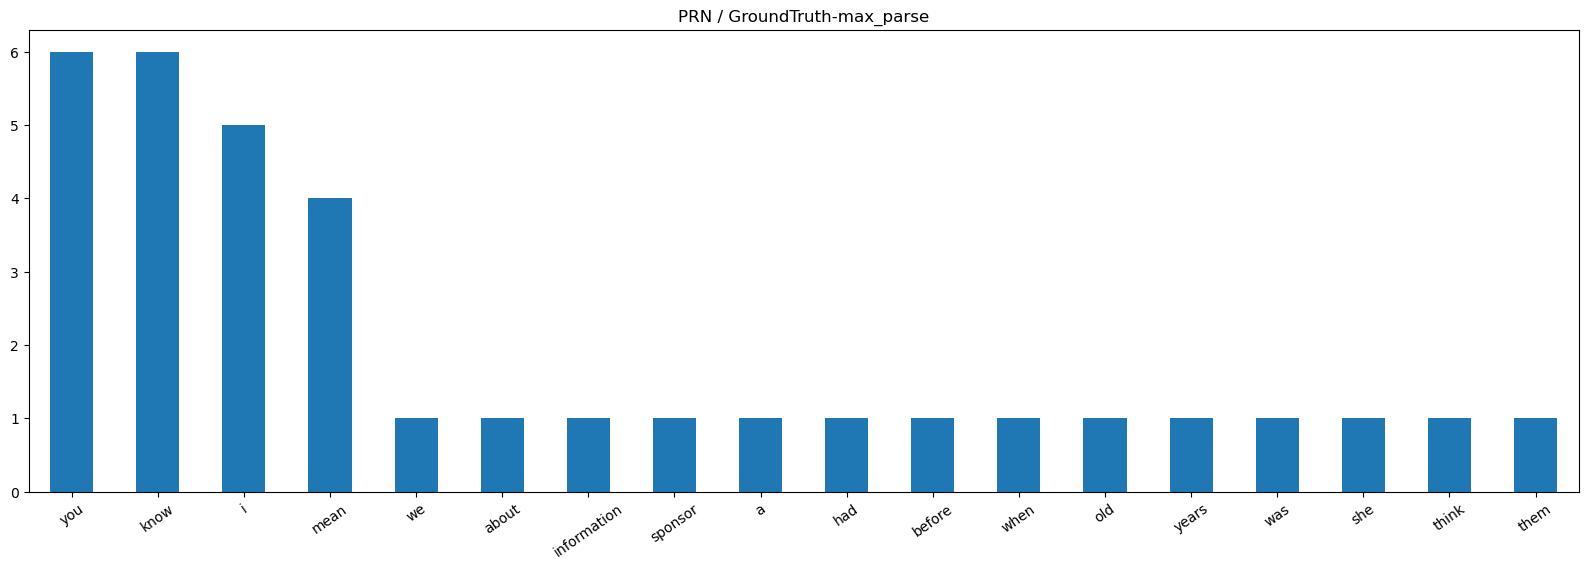

GROUNDTRUTH-NEUTRAL_PARSE
EDITED : Counter({'i': 9, 'you': 5, 'some': 4, "'m": 3, 'a': 3, 'thank': 3, 'ca': 3, "n't": 3, 'gonna': 2, 'and': 2, 'on': 2, 'the': 2, 'anal': 2, 'this': 1, 'is': 1, 'have': 1, 'cool': 1, 'stuff': 1, 'planned': 1, 'or': 1, 'his': 1, 'muscles': 1, 'ached': 1, 'com': 1, 'they': 1, "'ve": 1, 'of': 1, 'we': 1, "'re": 1, 'would': 1, 'take': 1, 'opportunity': 1, 'as': 1, 'dive': 1, 'into': 1, 'your': 1, 'design': 1, 'beyond': 1, 'little': 1, 'jesus': 1, 'see': 1, 'but': 1, 'jake': 1, 'are': 1, 'tell': 1, 'us': 1, 'where': 1})


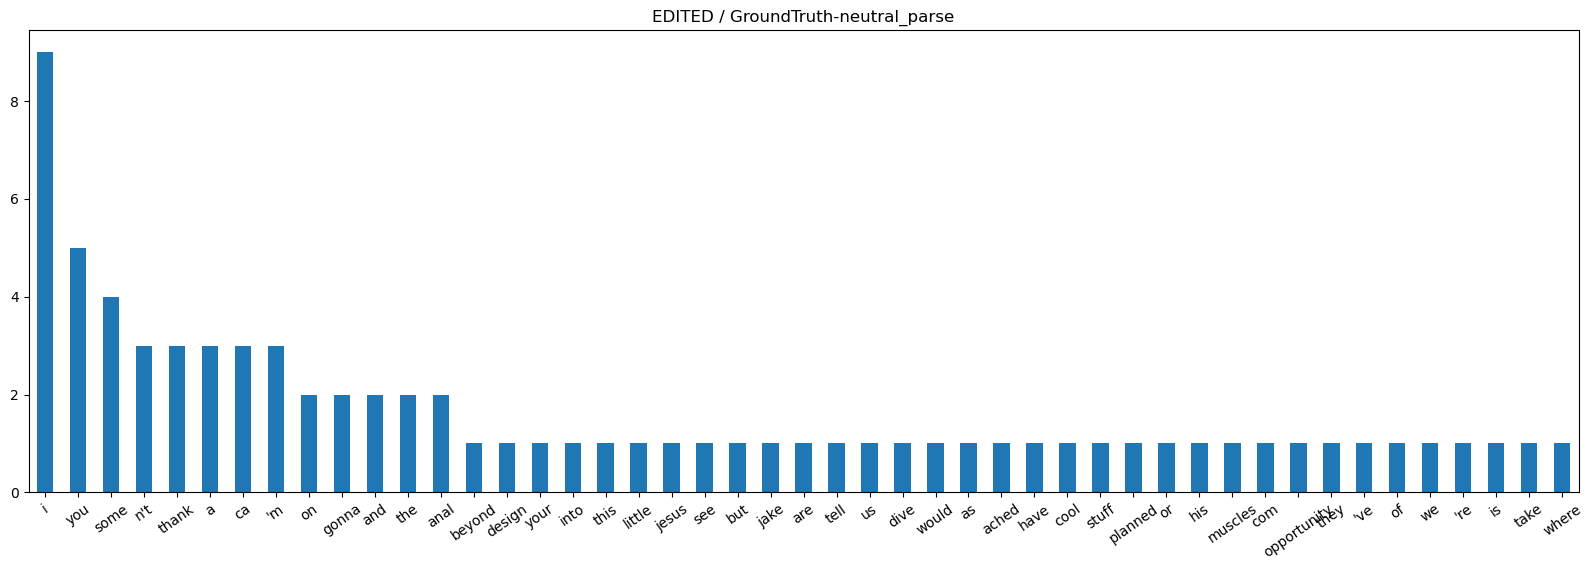

INTJ : Counter({'like': 11, 'um': 8, 'yeah': 7, 'uh': 6, 'yes': 3, 'hello': 2, 'well': 2, 'alright': 2, 'ow': 1, 'hell': 1, 'say': 1, 'so': 1, 'no': 1, 'hey': 1, 'welcome': 1, 'anal': 1, 'jesus': 1, 'oh': 1, 'shit': 1, 'goddammit': 1})


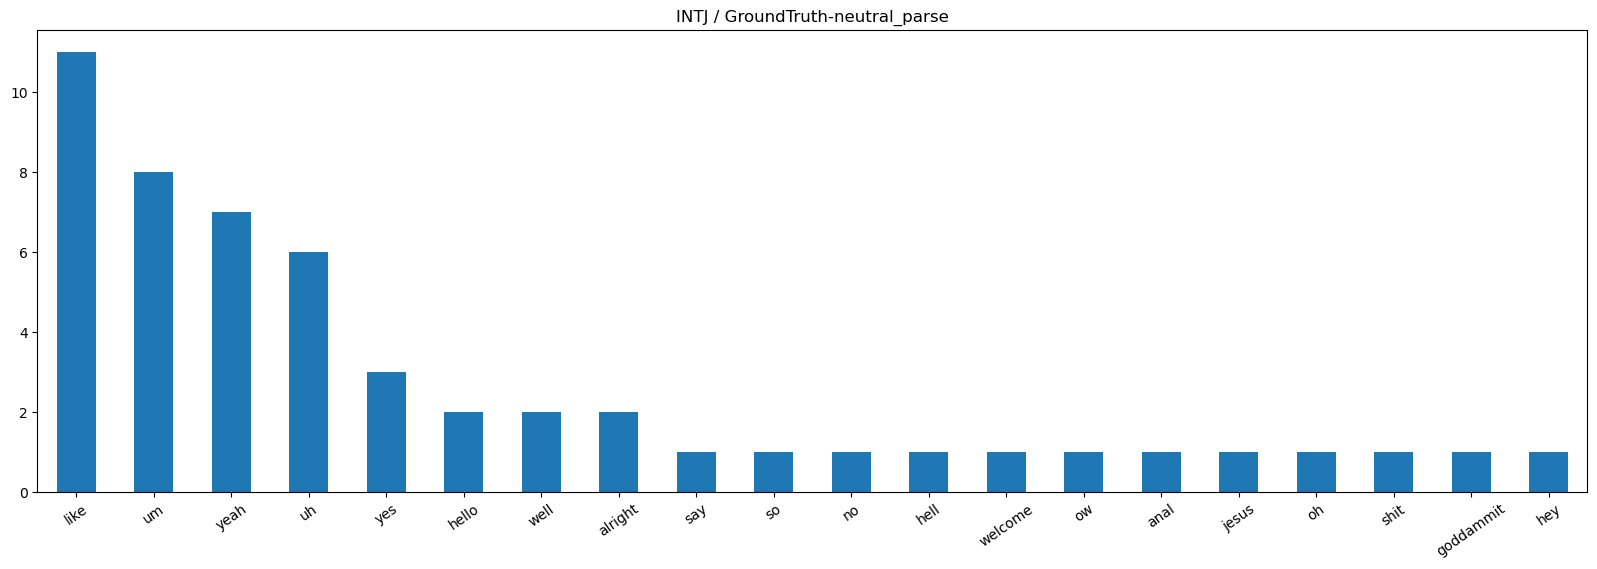

PRN : Counter({'you': 6, 'know': 6, 'i': 4, 'mean': 4, 'she': 1, 'was': 1, 'years': 1, 'old': 1, 'before': 1, 'when': 1, 'we': 1, 'had': 1, 'a': 1, 'sponsor': 1, 'information': 1, 'about': 1, 'them': 1, 'say': 1, 'that': 1})


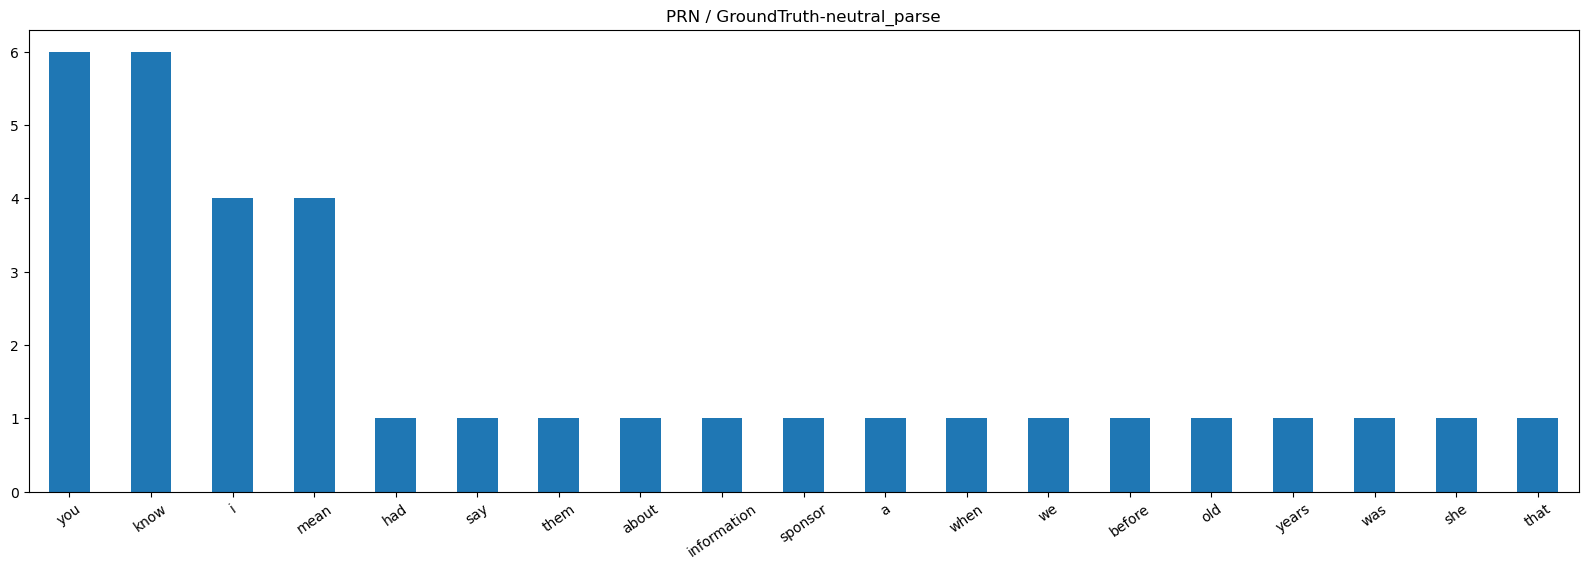

In [2]:
# adapted from tb.py, yields leaf nodes
def get_token_lists(tree):
    """Yields the terminal or leaf nodes of tree."""
    
    def edited_disfluent_visit(node):
        if isinstance(node, list):
            for child in node[1:]:
                yield from edited_disfluent_visit(child)
        else:
            yield node + " !E"
            
    def intj_disfluent_visit(node):
        if isinstance(node, list):
            for child in node[1:]:
                yield from intj_disfluent_visit(child)
        else:
            yield node + " !I"
            
    def prn_disfluent_visit(node):
        if isinstance(node, list):
            for child in node[1:]:
                yield from prn_disfluent_visit(child)
        else:
            yield node + " !P"
    
    def visit(node):
        if isinstance(node, list):
            
            # whichever is the topmost node wins (if there's like EDITED with an INTJ inside the tree)
            for child in node[1:]:
                if any(x in ["EDITED"] for x in child):
                    yield from edited_disfluent_visit(child)
                    
                if any(x in ["INTJ"] for x in child):
                    yield from intj_disfluent_visit(child)
                    
                if any(x in ["PRN"] for x in child):
                    yield from prn_disfluent_visit(child)
                    
                else:
                    yield from visit(child)
        else:
            yield node + " _"
            
    yield from visit(tree) 
    
       
for asr_parse in "GoogleASR_parse", "WhisperX_parse", "GroundTruth-min_parse", "GroundTruth-max_parse", "GroundTruth-neutral_parse":
    print(asr_parse.upper())
    
    # set up lists 
    edited_tokens = []
    intj_tokens = []
    prn_tokens = []
    
    # iterate through df parse trees and (1) get the word lists for the disfluent types, and (2) count the # of occurrences of those disfluent words
    for index, row in df.iterrows():
        
        # get trees
        utils_general.write_file("temp.txt", ".", row[asr_parse])
        trees = tb.read_file("./temp.txt") 
        
        for tup in list(get_token_lists(trees)):
            t1 = tup.split(" ")[0]
            t2 = tup.split(" ")[1]
        
            if t2 == "!E":
                edited_tokens.append(t1)
            elif t2 == "!I":
                intj_tokens.append(t1)
            elif t2 == "!P":
                prn_tokens.append(t1)
    
    for l in [("EDITED", edited_tokens), ("INTJ", intj_tokens), ("PRN", prn_tokens)]:
        
        # print info
        print(l[0], ":", Counter(l[1]))
        
        # plot info
        plt.figure(figsize=(20,6))
        pd.Series(l[1]).value_counts(sort=True).plot(kind="bar", title=f"{l[0]} / {asr_parse}")
        plt.xticks(rotation=35)
        plt.show()
        